# Project1

In [4]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing pandas to manipulate admissions. Importing Numpy to perform mathimatical builds

Reading CSV as a dataframe and getting a handle on what the data is featuring

In [2]:
df = pd.read_csv('admissions.csv')

In [3]:
df['gre'].dtypes

dtype('float64')

In [4]:
df.head(5)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


The data set includes a binary scale to see if the student is admitted, there GRE score, there grade point average and the prestige is there quality

## Building A Dictionary

In [1]:
ucla_data = {'Variable':['Admitted','GRE','GPA','Prestige'],'Description':['0:Not Admitted, 1: Admitted','Undergraduates GRE score', 'Undergraduates GPA score', 'Schools prestigious; 1: very high, 2: high, 3: low, 4: very low'],'Types':['Boolean','Quantitative','Quantitative','Categorical']}

In [2]:
ucla_data

{'Description': ['0:Not Admitted, 1: Admitted',
  'Undergraduates GRE score',
  'Undergraduates GPA score',
  'Schools prestigious; 1: very high, 2: high, 3: low, 4: very low'],
 'Types': ['Boolean', 'Quantitative', 'Quantitative', 'Categorical'],
 'Variable': ['Admitted', 'GRE', 'GPA', 'Prestige']}

In [5]:
df_z=pd.DataFrame(ucla_data)

This creates a dataframe of the array created above. This defines all the necessary data

In [6]:
df_z

,Description,Types,Variable
0,"0:Not Admitted, 1: Admitted",Boolean,Admitted
1,Undergraduates GRE score,Quantitative,GRE
2,Undergraduates GPA score,Quantitative,GPA
3,"Schools prestigious; 1: very high, 2: high, 3:...",Categorical,Prestige


In [9]:
len(df)

400

In [10]:
df.gre.mean()


588.0402010050251

In [11]:
df.tail()

,admit,gre,gpa,prestige
395,0,620.0,4.00,2.0
396,0,560.0,3.04,3.0
397,0,460.0,2.63,2.0
398,0,700.0,3.65,2.0
399,0,600.0,3.89,3.0


## Outcome & Covariates

Outcome: Admitted into school
Covariates: gre, gpa, prestige

## Problem Statement

Write a high quality problem statements

Those who were able to obtain a GPA 3.5 at a more prestigeious school, prestige <= 2, will have a better chance at getting into this grad program then those who obtain a GPA of 3.5 and higher at a less prestigious school

## Risk & Assumptions

Risk & Assumptions

Assumptions: Everyone is applying for the same program at the same time. That this is a normal distribution

Risk: We do not know the program these students are applying for. Do not know what the student's background, what kind of recommendations they received, extra cirricular activities they were involved with. We do not know what the definition is for what is labeled as "prestige". We are not aware of the timeframe this takes occurs, if this is over one year or a series of years

In [12]:
df.describe()


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [13]:
df1=df.dropna()

In [14]:
df1.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


## Outline the analysis

We can split this into two major sections. Prestigious schools with students obtaining a GPA greater than 3.5, and then another school that is not as prestigious with 3.5 greater GPA.

After creating our two categories, the length function can be used to see the number of students in each group. We could also take a look into seeing how these two groups differed by GRE and GPA as well to get a better understanding of the class. We might figure out that both groups have the same GPA and GRE score median, thus proving that prestigiousness is the main admissions factor for UCLA Grad School.

In [15]:
df1 = df[df['prestige']<=2]

In [16]:
df2=df1[df1['gpa']>=3.5]


In [25]:
df2.head()

,admit,gre,gpa,prestige
2,1,800.0,4.00,1.0
9,0,700.0,3.92,2.0
12,1,760.0,4.00,1.0
14,1,700.0,4.00,1.0
18,0,800.0,3.75,2.0


<IPython.core.display.Javascript object>


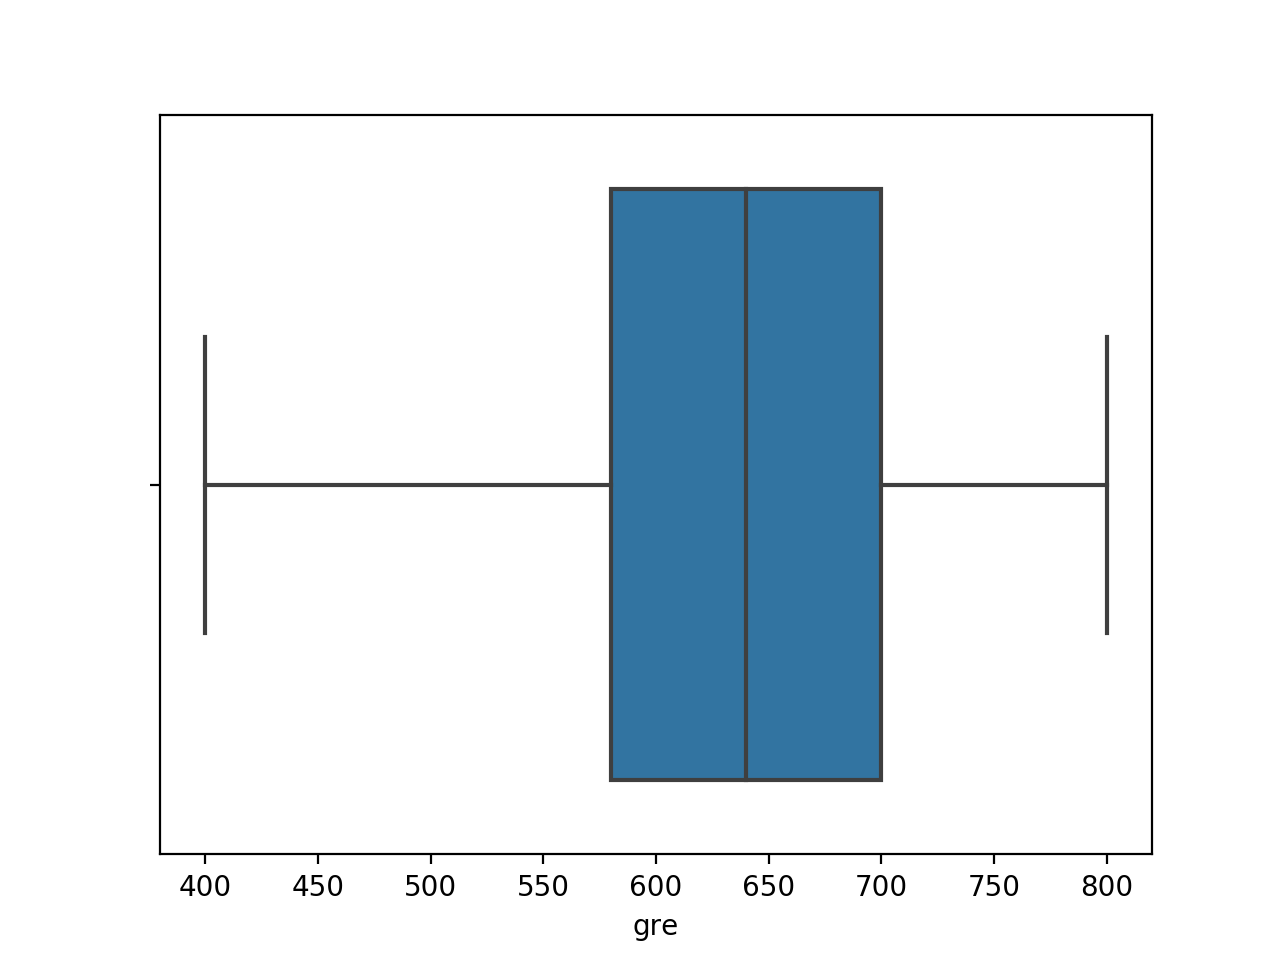

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [35]:
plt.figure()

sns.boxplot(x=df2.gre)

<IPython.core.display.Javascript object>


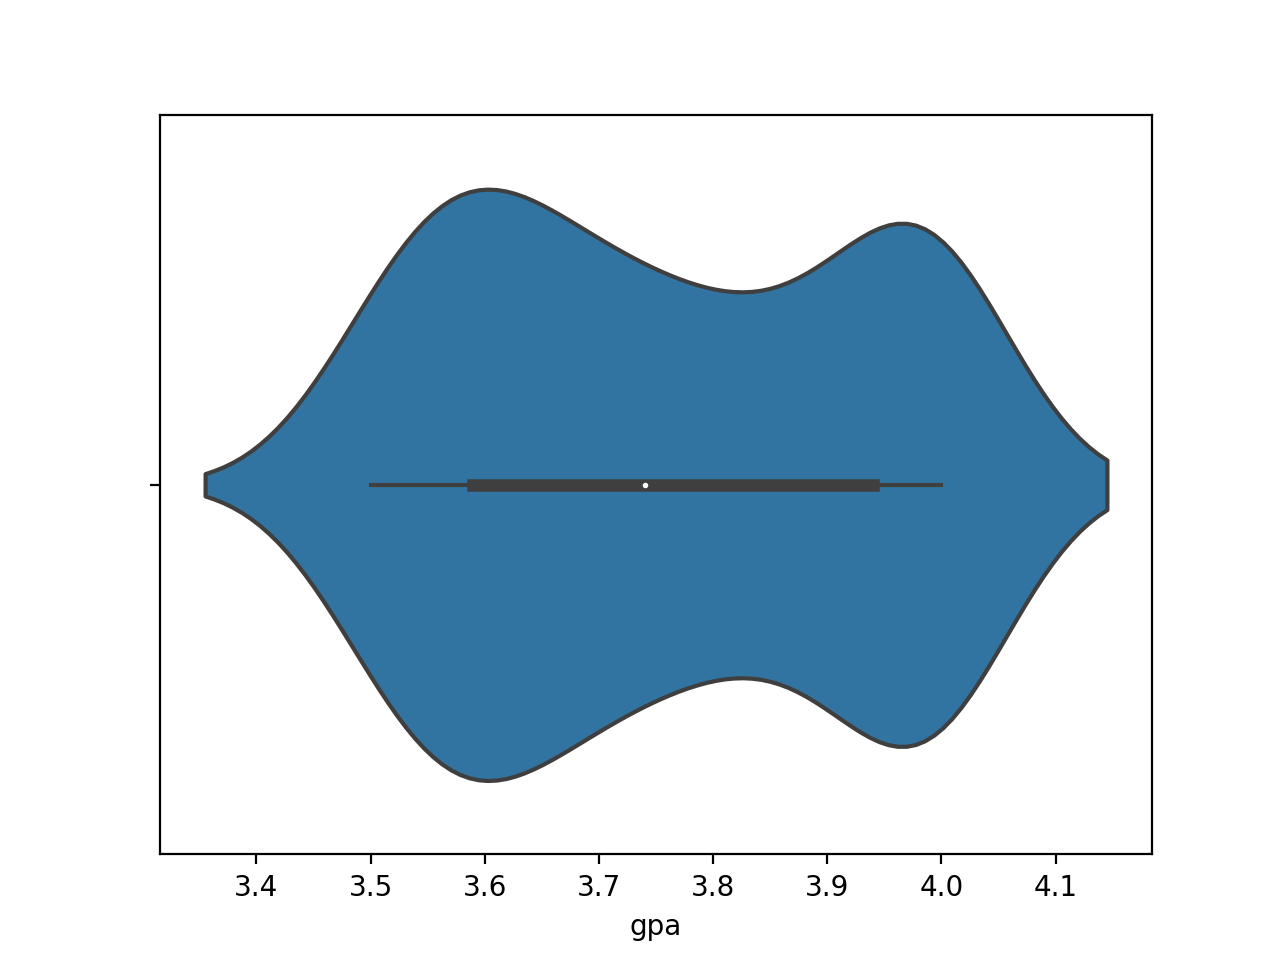

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


In [50]:
plt.figure()

sns.violinplot(x=df2.gpa)

In [18]:
len(df2[df2['admit']==1])

43

In [19]:
df3=df[df['prestige']>2]


In [42]:
df3.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
8,1,540.0,3.39,3.0


In [20]:
df4=df3[df3['gpa']>=3.5]

<IPython.core.display.Javascript object>


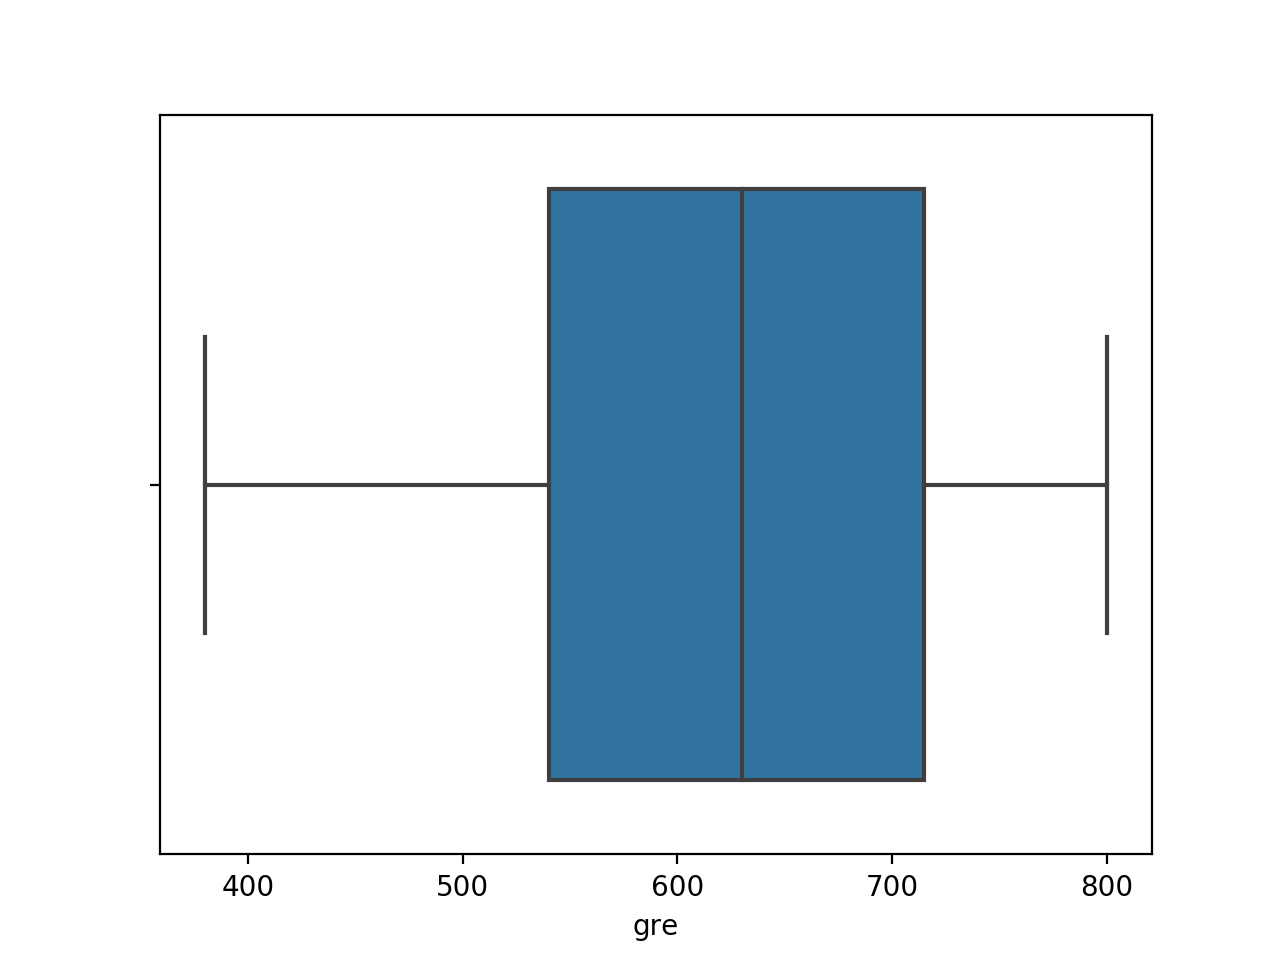

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


In [39]:
plt.figure()
sns.boxplot(df4.gre)

<IPython.core.display.Javascript object>


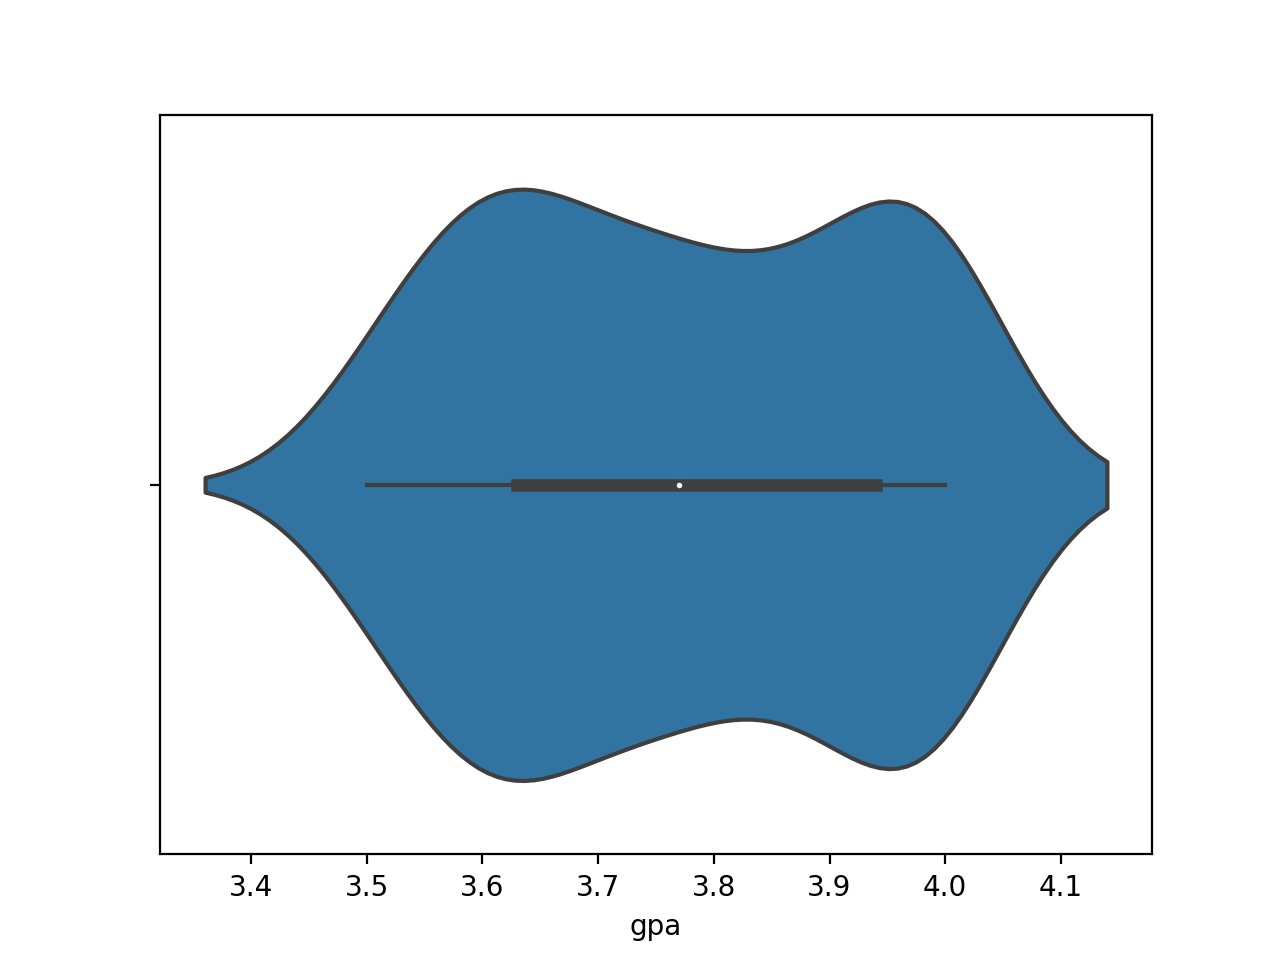

/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/paulszewczyk/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


In [56]:
plt.figure()
sns.violinplot(df4.gpa)

In [46]:
df4.median()


admit         0.00
gre         630.00
gpa           3.77
prestige      3.00
dtype: float64

In [48]:
df4.skew()

admit       0.699984
gre        -0.282649
gpa         0.009378
prestige    0.979145
dtype: float64

In [45]:
df2.median()

admit         0.50
gre         640.00
gpa           3.74
prestige      2.00
dtype: float64

In [47]:
df2.skew()

admit       0.000000
gre        -0.031622
gpa         0.105580
prestige   -0.591600
dtype: float64

In [21]:
len(df4[df4['admit']==1])

25

Out of the two groups with a high GPA, there was a higher amount of students accepted into the UCLA grad program when they had a GPA greater than to a prestigious school as well.

When examining the two subsets, the non prestigeious school had a slightly higher GPA, 3.77 v 3.74. The violinplots for GPA shows a slight dip in the end for the students who wen to the prestigious schools.
While the prestigeous school may have had a slightly lower GPA, they did have a slightly higher GRE score, beating their counterpart by 10 points.